## Naïve Bayes Classification in Python

- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Load and return the iris dataset (classification).

The iris dataset is a classic and very easy multi-class classification
dataset.

<pre>
=================   ============== 
Classes                          3
Samples per class               50
Samples total                  150
Dimensionality                   4
Features            real, positive
=================   ==============
</pre>

In [2]:
from sklearn.datasets import load_iris

df = load_iris()

In [3]:
X = df.data
y = df.target

In [4]:
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [5]:
print(y.shape, X.shape)

(150,) (150, 4)


- Confusion matrix
- classification report
- cross validation

## train test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(105,) (45,)
(105, 4) (45, 4)


In [8]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.multiclass import OneVsRestClassifier

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [9]:
from sklearn import metrics

In [10]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)*100

97.77777777777777

In [11]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [12]:
target_names = ['Setosa' , 'Versicolour', 'Virginica']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
 Versicolour       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Confusion Matrix

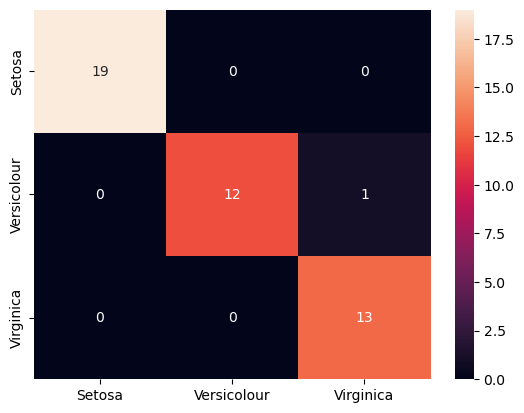

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, 
                     index = target_names,
                     columns = target_names)

sns.heatmap(cm_df, annot=True)
plt.show()

## K-Fold

- Final accuracy is enough
- Leave-One-Out cross-validator:
  - Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

In [14]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [15]:
n_folds = 5

scores = cross_val_score(clf, X, y, cv = LeaveOneOut())
# print(scores)

scores.mean()*100

95.33333333333334